In [4]:
import pandas as pd

# Load cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
sierra_leone = pd.read_csv('../data/sierra_leone_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into a single DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

C:\Users\eep\AppData\Local\Temp\ipykernel_18520\771430027.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette="Set2")
C:\Users\eep\AppData\Local\Temp\ipykernel_18520\771430027.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette="Set2")
C:\Users\eep\AppData\Local\Temp\ipykernel_18520\771430027.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette="Set2")


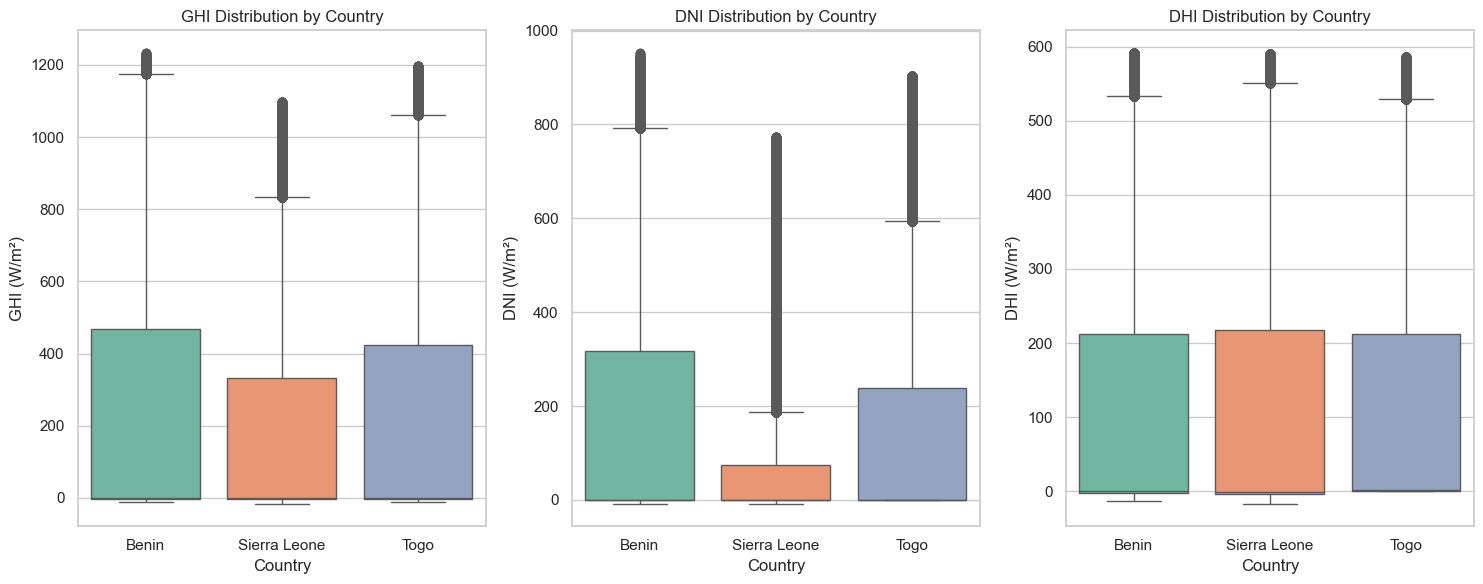

In [5]:
#Metric Comparison: Boxplots of GHI, DNI, DHI by Country
import matplotlib.pyplot as plt
import seaborn as sns

# Define plot style
sns.set(style="whitegrid")

# List of metrics to compare
metrics = ['GHI', 'DNI', 'DHI']

plt.figure(figsize=(15, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x='Country', y=metric, palette="Set2")
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric + ' (W/m²)')
    plt.xlabel('Country')

plt.tight_layout()
plt.show()

In [9]:
# Summary Mean, Median, Standard Deviation
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
print(summary.to_markdown(index=True))

| Country      |   GHI_mean |   GHI_median |   GHI_std |   DNI_mean |   DNI_median |   DNI_std |   DHI_mean |   DHI_median |   DHI_std |
|:-------------|-----------:|-------------:|----------:|-----------:|-------------:|----------:|-----------:|-------------:|----------:|
| Benin        |    236.235 |          0.7 |   328.289 |    166.897 |         -0.1 |   262.082 |    111.656 |          0.5 |   153.1   |
| Sierra Leone |    185     |         -0.4 |   279.019 |    104.129 |         -0.1 |   200.954 |    108.104 |         -0.6 |   153.692 |
| Togo         |    223.86  |          0.5 |   317.306 |    147.976 |          0   |   247.684 |    112.781 |          1.5 |   151.572 |


In [10]:
#Statistical Testing: One-way ANOVA or Kruskal-Wallis Test
from scipy.stats import kruskal

# Extract values per country
ghi_benin = benin['GHI'].values
ghi_sierra = sierra_leone['GHI'].values
ghi_togo = togo['GHI'].values

# Perform Kruskal-Wallis test
stat, p_value = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"\nKruskal-Wallis Test on GHI:\nH-statistic: {stat:.2f}, p-value: {p_value:.4f}")


Kruskal-Wallis Test on GHI:
H-statistic: 6548.53, p-value: 0.0000


C:\Users\eep\AppData\Local\Temp\ipykernel_18520\4191170836.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=summary.index, y=summary['GHI_mean'], palette="Blues", ci=None)
C:\Users\eep\AppData\Local\Temp\ipykernel_18520\4191170836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['GHI_mean'], palette="Blues", ci=None)


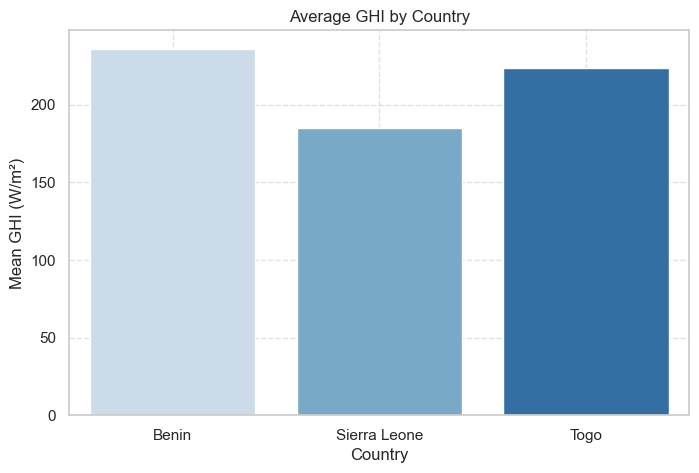

In [11]:
#Bar Chart Ranking Average GHI
plt.figure(figsize=(8, 5))
sns.barplot(x=summary.index, y=summary['GHI_mean'], palette="Blues", ci=None)
plt.title("Average GHI by Country")
plt.ylabel("Mean GHI (W/m²)")
plt.xlabel("Country")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()